### Building a Perceptron-based classifier

In [1]:
import numpy as np
import neurolab as nl

import matplotlib.pyplot as plt

In [2]:
#Load input data
text = np.loadtxt('data/data_perceptron.txt')

In [3]:
#Separate datapoints and labels
data = text[:, :2]
labels = text[:, 2].reshape((text.shape[0], 1))

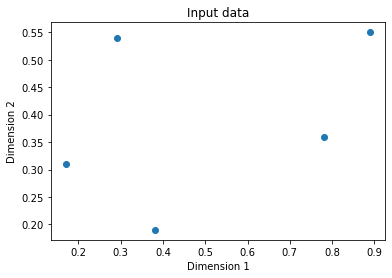

In [4]:
#Plot input data
plt.figure()
plt.scatter(data[:, 0], data[:, 1])

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

plt.title('Input data');

In [5]:
#Define the minimum and maximum values for each dimension
dim1_min, dim1_max, dim2_min, dim2_max = 0, 1, 0, 1

#Number of neurons in the output layer
num_output = labels.shape[1]

In [6]:
#Define a perceptron with 2 input neurons; since we have 2 dimensions in the input data
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]

perceptron = nl.net.newp([dim1, dim2], num_output)

In [7]:
#Train the perceptron using the data
error_progress = perceptron.train(data, labels, epochs = 100, show = 20, lr = 0.03)

The goal of learning is reached


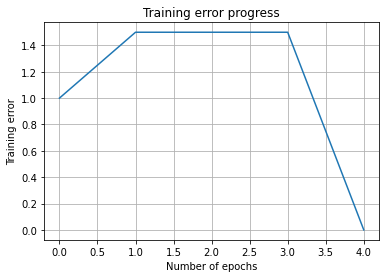

In [8]:
#Plot how the training process went
plt.figure()
plt.plot(error_progress)

plt.xlabel('Number of epochs')
plt.ylabel('Training error')

plt.title('Training error progress')
plt.grid();

### Constructing a single-layer neural network

In [9]:
#Load input data
text = np.loadtxt('data/data_simple_nn.txt')

In [10]:
#Separate it into datapoints and labels
data = text[:, 0:2]
labels = text[:, 2:]

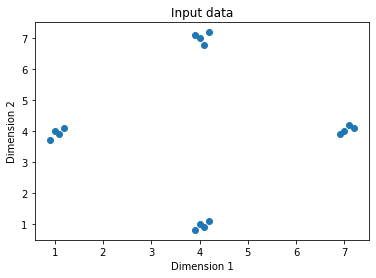

In [11]:
#Plot input data
plt.figure()
plt.scatter(data[:, 0], data[:, 1])

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input data');

In [12]:
#Minimum and maximum values for each dimension
dim1_min, dim1_max = data[:, 0].min(), data[:, 0].max()
dim2_min, dim2_max = data[:, 1].min(), data[:, 1].max()

#Define the number of neurons in the output layer
num_output = labels.shape[1]

In [13]:
#Define a single-layer neural network
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]

nn = nl.net.newp([dim1, dim2], num_output)

In [14]:
#Train the neural network
error_progress = nn.train(data, labels, epochs = 100, show = 20, lr = 0.03)

Epoch: 20; Error: 4.0;
Epoch: 40; Error: 4.0;
Epoch: 60; Error: 4.0;
Epoch: 80; Error: 4.0;
Epoch: 100; Error: 4.0;
The maximum number of train epochs is reached


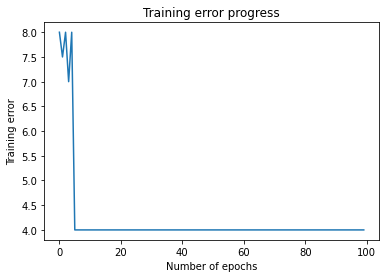

In [15]:
#Plot the training process
plt.figure()
plt.plot(error_progress)

plt.xlabel('Number of epochs')
plt.ylabel('Training error')
plt.title('Training error progress');

In [16]:
#Run the classifier on test datapoints
print('Test results\n')

data_test = [[0.4, 4.3], [4.4, 0.6], [4.7, 8.1]]
for item in data_test:
    print(f'{item} --> {nn.sim([item])[0]}')

Test results

[0.4, 4.3] --> [0. 0.]
[4.4, 0.6] --> [1. 0.]
[4.7, 8.1] --> [1. 1.]


### Constructing a multi-layer neural network

In [17]:
#Generate some training data based on equation y = 3x^2 + 5
min_val, max_val = -15, 15
num_points = 130

x = np.linspace(min_val, max_val, num_points)

y = 3 * np.square(x) + 5
y /= np.linalg.norm(y)

In [18]:
#Create data and labels
data = x.reshape(num_points, 1)
labels = y.reshape(num_points, 1)

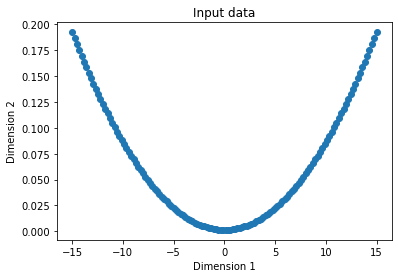

In [19]:
#Plot the input data
plt.figure()
plt.scatter(data, labels)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input data');

In [20]:
#Define a multilayer neural network with 2 hidden layers with 10 neurons in first layer and 6 neurons in second layer
nn = nl.net.newff([[min_val, max_val]], [10, 6, 1])

#Set the training algorithm to gradient descent
nn.trainf = nl.train.train_gd

In [21]:
#Train the neural network
error_progress = nn.train(data, labels, epochs = 2000, show = 100, goal = 0.01)

Epoch: 100; Error: 0.09470511815051386;
Epoch: 200; Error: 0.024000672948643664;
Epoch: 300; Error: 0.038408574427154014;
Epoch: 400; Error: 0.017907092694146802;
Epoch: 500; Error: 0.03228642533398067;
Epoch: 600; Error: 0.021208148428181913;
Epoch: 700; Error: 0.030527181937777294;
Epoch: 800; Error: 0.025958817941587;
Epoch: 900; Error: 0.024656577517724956;
Epoch: 1000; Error: 0.028097841762229188;
Epoch: 1100; Error: 0.020363432430889086;
Epoch: 1200; Error: 0.026210607276967994;
Epoch: 1300; Error: 0.01858590523325688;
Epoch: 1400; Error: 0.02155690738266622;
Epoch: 1500; Error: 0.017648388763946064;
Epoch: 1600; Error: 0.018058972343719126;
Epoch: 1700; Error: 0.019557434898169766;
Epoch: 1800; Error: 0.012293123438928698;
The goal of learning is reached


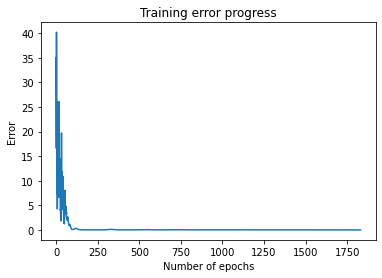

In [22]:
#Plot the training process
plt.figure()
plt.plot(error_progress)

plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title('Training error progress');

In [23]:
#Run the neural network on training datapoints
output = nn.sim(data)
y_pred = output.reshape(num_points)

x_dense = np.linspace(min_val, max_val, num_points * 2)
y_dense_pred = nn.sim(x_dense.reshape(x_dense.size, 1)).reshape(x_dense.size)

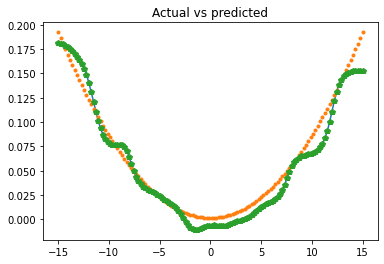

In [24]:
#Plot the predicted output
plt.figure()
plt.plot(x_dense, y_dense_pred, '-', x, y, '.', x, y_pred, 'p')

plt.title('Actual vs predicted');

### Building a vector quantizer

In [25]:
#Load input data
text = np.loadtxt('data/data_vector_quantization.txt')

In [26]:
#Separate into data and labels
data = text[:, 0:2]
labels = text[:, 2:]

In [27]:
#Define a neural network with 2 layers, 10 neurons in input layer and 4 neurons in the output layer
num_input_neurons = 10
num_output_neurons = 4
weights = [1/num_output_neurons] * num_output_neurons

nn = nl.net.newlvq(nl.tool.minmax(data), num_input_neurons, weights)

In [28]:
#Train the neural network
_ = nn.train(data, labels, epochs = 500, goal = -1)

Epoch: 100; Error: 0.0;
Epoch: 200; Error: 0.0;
Epoch: 300; Error: 0.0;
Epoch: 400; Error: 0.0;
Epoch: 500; Error: 0.0;
The maximum number of train epochs is reached


In [32]:
#Create a grid of points in order to visualize the output clusters
xx, yy = np.meshgrid(np.arange(0, 10, 0.2), np.arange(0, 10, 0.2))
xx.shape = xx.size, 1
yy.shape = yy.size, 1

grid_xy = np.concatenate((xx, yy), axis = 1)

In [34]:
#Evaluate the input grid of points
grid_eval = nn.sim(grid_xy)

In [38]:
#Define the four classes
class_1 = data[labels[:, 0] == 1]
class_2 = data[labels[:, 1] == 1]
class_3 = data[labels[:, 2] == 1]
class_4 = data[labels[:, 3] == 1]

In [39]:
#Define X-Y grids for all the 4 classes
grid_1 = grid_xy[grid_eval[:, 0] == 1]
grid_2 = grid_xy[grid_eval[:, 1] == 1]
grid_3 = grid_xy[grid_eval[:, 2] == 1]
grid_4 = grid_xy[grid_eval[:, 3] == 1]

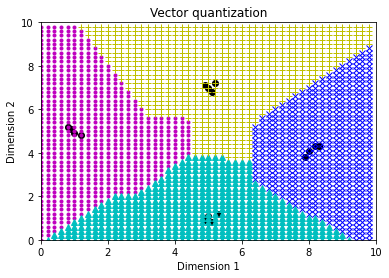

In [48]:
#Plot the outputs
plt.figure()
plt.plot(class_1[:, 0], class_1[:, 1], 'ko', class_2[:, 0], class_2[:, 1], 'ko', 
        class_3[:, 0], class_3[:, 1], 'ko', class_4[:, 0], class_4[:, 1], 'ko')

plt.plot(grid_1[:, 0], grid_1[:, 1], 'm.', grid_2[:, 0], grid_2[:, 1], 'bx',
        grid_3[:, 0], grid_3[:, 1], 'c^', grid_4[:, 0], grid_4[:, 1], 'y+')

plt.axis([0, 10, 0, 10])

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Vector quantization');